In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
select_year = 2017

## Open Data

In [3]:

input = './data/%d/preprocess.csv.xz' % select_year
df = pd.read_csv(input, header=None, compression='xz')
print('docs shape:', df.shape)

docs shape: (3055, 1)


## TF-IDF

In [4]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=.0025, max_df=.1, ngram_range=(1,2))
tfidf = tfidf_vectorizer.fit_transform(df[0])

weights = np.asarray(tfidf.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tfidf_vectorizer.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)



,term,weight
849,learn,0.016811
1445,softwar,0.015187
1199,problem,0.014865
947,method,0.014180
425,detect,0.013513
541,evalu,0.013385
1202,process,0.012900
431,develop,0.012835
296,comput,0.012755
1083,optim,0.012375


In [5]:
print('vocabulary:', len(tfidf_vectorizer.vocabulary_))
print('sparse matrix shape:', tfidf.shape)
print('nonzero count:', tfidf.nnz)
print('sparsity: %.2f%%' % (100.0 * tfidf.nnz / (tfidf.shape[0] * tfidf.shape[1])))

vocabulary: 1734
sparse matrix shape: (3055, 1734)
nonzero count: 48443
sparsity: 0.91%


## NMF

In [6]:
nmf = NMF(n_components=50, solver="mu")
W = nmf.fit_transform(tfidf)
H = nmf.components_

idx_to_word = np.array(tfidf_vectorizer.get_feature_names())
for i, topic in enumerate(H):
    print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in idx_to_word[topic.argsort()[-10:]]])))

Topic 1: genom,comput,path,predict,automat,classifi,diseas,forest,identif,segment
Topic 2: softwar ecosystem,ecosystem,softwar develop,softwar engin,engin,softwar product,line,product line,product,softwar
Topic 3: vehicl,neighborhood,search,schedul problem,solv,schedul,heurist,rout problem,rout,problem
Topic 4: simul,cost,robot,low cost,format,voltag,robust,low,autonom,control
Topic 5: reinforc learn,adapt,learn approach,base learn,environ,machin learn,learn object,machin,learn environ,learn
Topic 6: number,free,larg,threshold,convex,path,modal,color,edg,graph
Topic 7: wireless network,rout,network use,channel,industri,sink,sensor network,wireless sensor,wireless,sensor
Topic 8: plan,big,privaci,perform,environ,secur,cloud comput,servic,comput,cloud
Topic 9: low,gpu base,schedul,forecast,simul,seri,time seri,real time,real,time
Topic 10: map studi,requir,systemat map,systemat review,systemat literatur,map,literatur review,literatur,review,systemat
Topic 11: locat,distanc,practic,studen

In [7]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.3f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

no_top_words = 10
feature_names = tfidf_vectorizer.get_feature_names()
display_topics(nmf,idx_to_word,no_top_words)


,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,...,Topic 45 words,Topic 45 weights,Topic 46 words,Topic 46 weights,Topic 47 words,Topic 47 weights,Topic 48 words,Topic 48 weights,Topic 49 words,Topic 49 weights
0,segment,1.084,softwar,2.280,problem,2.429,control,2.471,learn,2.556,...,fault,1.706,recognit,2.016,parallel,1.773,estim,1.538,energi,1.985
1,identif,0.740,product,0.935,rout,0.462,autonom,0.241,learn environ,0.420,...,toler,0.914,multipl,0.579,perform,1.100,logic,1.393,effici,0.840
2,forest,0.704,product line,0.862,rout problem,0.412,low,0.234,machin,0.370,...,fault toler,0.909,facial,0.531,gpu,0.788,complex,0.936,power,0.596
3,diseas,0.694,line,0.852,heurist,0.399,robust,0.231,learn object,0.367,...,diagnosi,0.879,video,0.518,machin,0.644,decis,0.497,energi effici,0.557
4,classifi,0.679,softwar product,0.749,schedul,0.390,voltag,0.215,machin learn,0.362,...,low,0.474,recognit base,0.421,high,0.498,relat,0.421,hevc,0.543
5,automat,0.659,engin,0.520,solv,0.389,format,0.201,environ,0.332,...,motor,0.420,express,0.402,effect,0.373,descript,0.350,new,0.485
6,predict,0.626,softwar engin,0.370,schedul problem,0.338,low cost,0.171,base learn,0.270,...,automat,0.415,face,0.399,acceler,0.355,bayesian,0.345,optic,0.412
7,path,0.541,softwar develop,0.314,search,0.332,robot,0.164,learn approach,0.252,...,power,0.411,3d,0.345,effici,0.315,point,0.342,optic network,0.359
8,comput,0.532,ecosystem,0.310,neighborhood,0.294,cost,0.164,adapt,0.233,...,reconfigur,0.355,facial express,0.310,framework,0.291,probabilist,0.337,elast,0.300
9,genom,0.483,softwar ecosystem,0.241,vehicl,0.289,simul,0.160,reinforc learn,0.229,...,implement,0.352,face recognit,0.308,core,0.275,paramet,0.330,electr,0.300


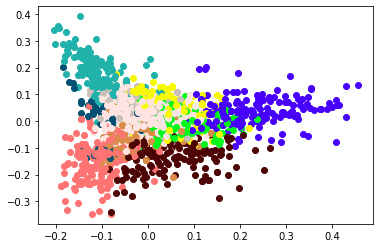

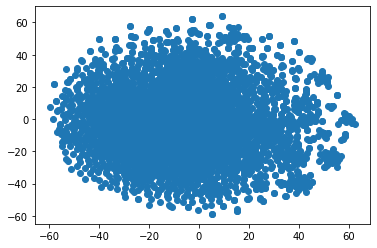

In [8]:
num_clusters = 10
num_seeds = 10
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}
pca_num_components = 2
tsne_num_components = 2

# create k-means model with custom config
clustering_model = KMeans(
    n_clusters=num_clusters,
    max_iter=max_iterations,
    precompute_distances="auto",
    n_jobs=-1
)

labels = clustering_model.fit_predict(tfidf)
#print(labels)

X = tfidf.todense()

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
#print(reduced_data)

fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data):
    #print(instance, index, labels[index])
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.show()

# t-SNE plot
embeddings = TSNE(n_components=tsne_num_components)
Y = embeddings.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.show()